In [203]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [108]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [109]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
879,spam,U have a Secret Admirer who is looking 2 make ...,NaN,NaN,NaN
3828,ham,"Sure, I'll see if I can come by in a bit",NaN,NaN,NaN
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,NaN,NaN,NaN
2193,ham,I called but no one pick up e phone. I ask bot...,NaN,NaN,NaN
3985,ham,"Friendship is not a game to play, It is not a ...",NaN,NaN,NaN
3181,ham,"My Parents, My Kidz, My Friends n My Colleague...",NaN,NaN,NaN
3662,ham,Frnd s not juz a word.....not merely a relatio...,NaN,NaN,NaN
2926,ham,Ok... U enjoy ur shows...,NaN,NaN,NaN
4305,ham,Awww dat is sweet! We can think of something t...,NaN,NaN,NaN
2406,ham,One of best dialogue in cute reltnship..!! \We...,Dont Come Near My Body..!! Bcoz My Hands May ...,NaN,NaN


In [110]:
df.shape

(5572, 5)

In [111]:
# DATA CLEANING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [112]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], inplace=True)

In [113]:
df.sample(5)

,v1,v2
326,ham,Hi da:)how is the todays class?
1240,ham,Oh yes I can speak txt 2 u no! Hmm. Did u get ...
4387,ham,"see you then, we're all christmassy here!"
2527,ham,Mmmmm ... I loved waking to your words this mo...
5266,ham,HI DARLIN ITS KATE ARE U UP FOR DOIN SOMETHIN ...


In [114]:
#renaming 
df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [115]:
encoder = LabelEncoder()
df['Target']= encoder.fit_transform(df['Target'])

In [116]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [118]:
df.duplicated().sum()

403

In [119]:
df = df.drop_duplicates(keep='first')

In [120]:
df.duplicated().sum()

0

In [121]:
# EDA

df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

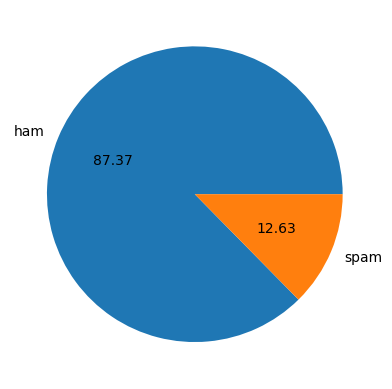

In [122]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [167]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/kavan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/kavan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [169]:
df['num_of_char'] = df['Text'].apply(len)

In [171]:
df.head(10)

,Target,Text,num_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [177]:
df['num_words'] =df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [179]:
df


,Target,Text,num_of_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [181]:
df['num_sentences'] =df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [183]:
df


,Target,Text,num_of_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [199]:
df.describe()


,Target,num_of_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [195]:
df[df['Target']==0].describe()

,Target,num_of_char,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [201]:
df[df['Target']==1].describe()

,Target,num_of_char,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_of_char', ylabel='Count'>

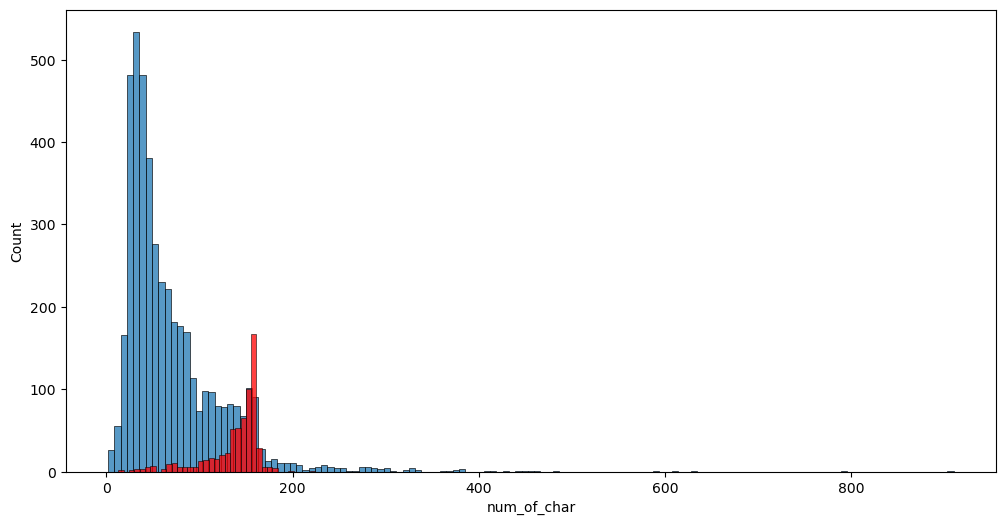

In [221]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_of_char'])
sns.histplot(df[df['Target']==1]['num_of_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

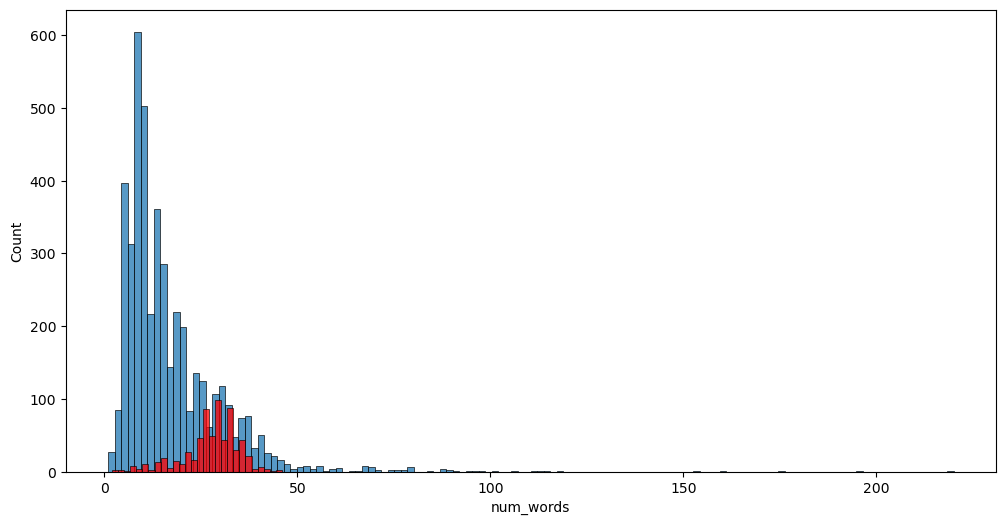

In [225]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color='red')

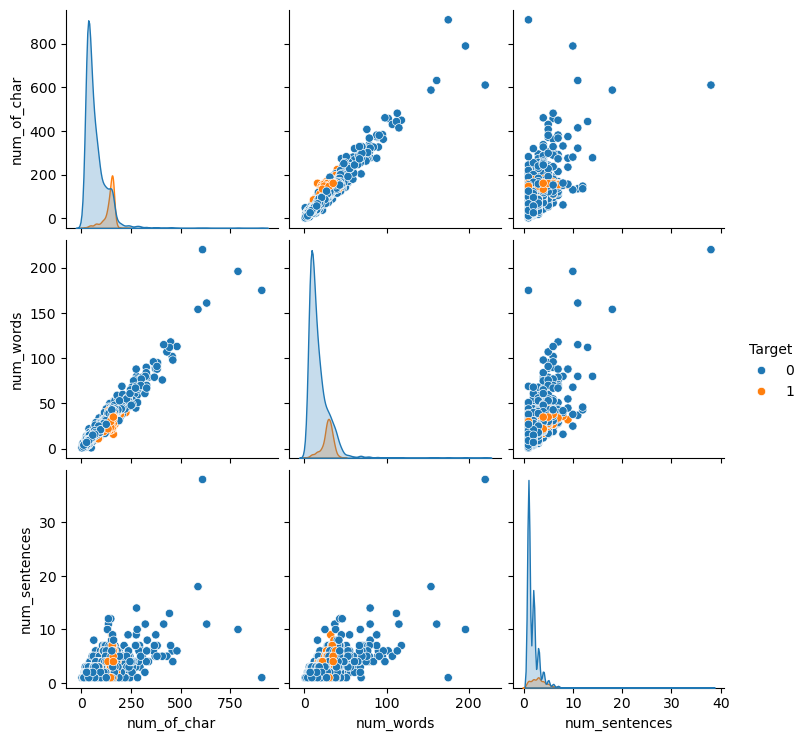

In [227]:
sns.pairplot(df,hue='Target')


In [231]:
numeric_df = df.select_dtypes(include=['number'])

In [233]:
numeric_df.corr()

,Target,num_of_char,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_of_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

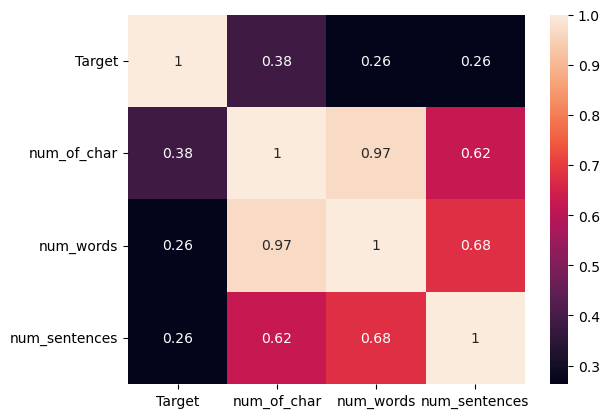

In [237]:
sns.heatmap(numeric_df.corr(), annot=True)

In [273]:
""" TEXT PREPROCESSING
    1. Lower case
    2. Tokenize
    3. Remove special character, stop words and punctuation
    4. Stemming  
"""
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to /Users/kavan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [305]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y
    x=[]

    for i in text:
        if i not in stopwords.words('english') and string.punctuation:
            x.append(i)

    text = x
    z = []

    for i in text:
        z.append(ps.stem(i))
    
    return " ".join(z)
    

transform_text(df['Text'][100])

'okay name ur price long legal wen pick u ave x am xx'

In [261]:
stopwords.words('english')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [275]:
ps = PorterStemmer()
ps.stem('walking')

'walk'

In [310]:
df['transformed_text']=df['Text'].apply(transform_text)

In [312]:
df.head()

,Target,Text,num_of_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [316]:
!pip install wordcloud

In [332]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [334]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

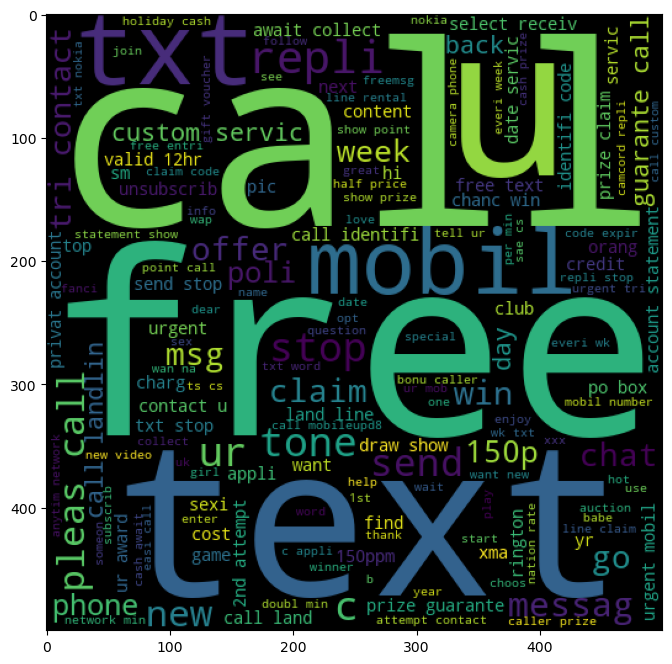

In [340]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [342]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

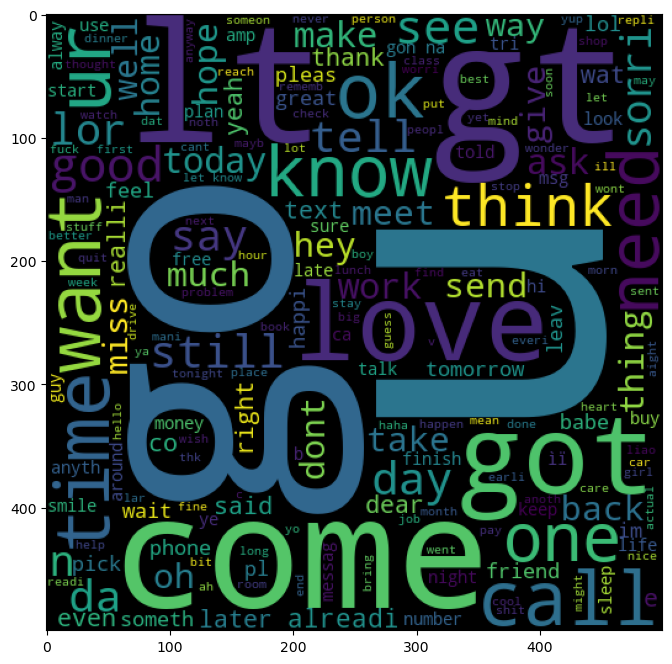

In [346]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [360]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

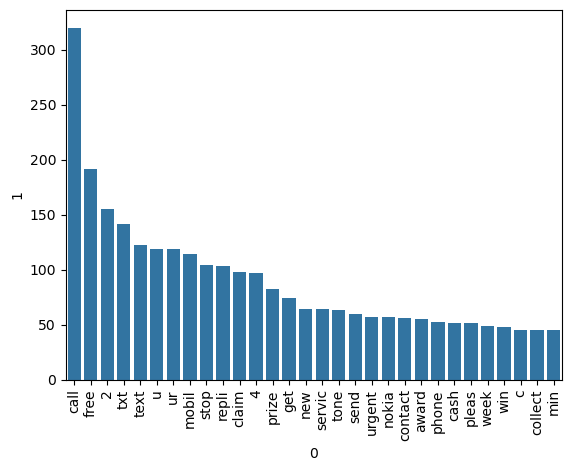

In [398]:
'''word_freq={}
for words in spam_corpus:
    if words in word_freq:
        word_freq[words] += 1
    else:
        word_freq[words] = 1

print(word_freq) '''

# OR 

from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [400]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

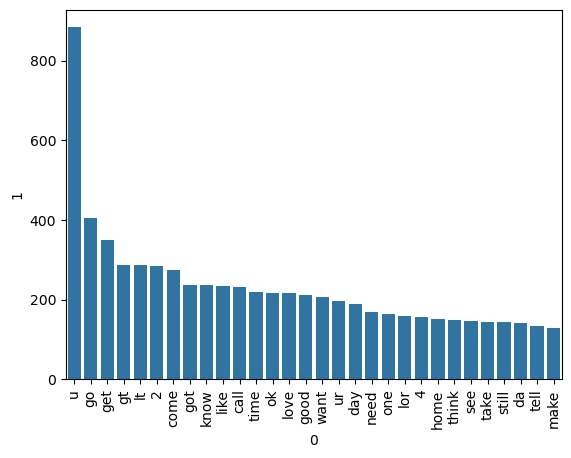

In [402]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [407]:
# Naive Bayes best for textual data 
""" MODEL BUILDING """

In [567]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [569]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [571]:
 """ from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X) """

' from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = scaler.fit_transform(X) '

In [573]:
X.shape

(5169, 3000)

In [575]:
y = df['Target'].values

In [577]:
from sklearn.model_selection import train_test_split

In [579]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [581]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [583]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [585]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


<Axes: >

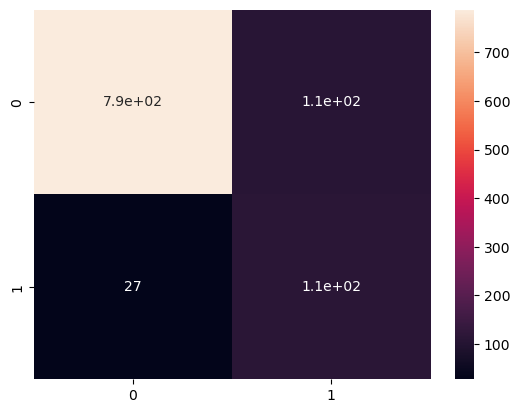

In [587]:
sns.heatmap(confusion_matrix(y_test,y_pred1), annot=True)

In [589]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [591]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [511]:
# https://github.com/campusx-official/sms-spam-classifier

In [593]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))